In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy.polynomial as poly

%matplotlib inline

## Adapted from 
https://github.com/cantaro86/Financial-Models-Numerical-Methods/tree/master

In [4]:
N = 10      # number of time steps
S0 = 100.0  # spot stock price
K = 105.0  # strike
T = 2.0  # maturity
r = 0.05  # risk free rate
sigma = 0.2  # diffusion coefficient or volatility
dt = T / (N - 1)  # time interval
df = np.exp(-r * dt)  # discount factor per time time interval

paths=10
order=2

X0 = np.zeros((paths, 1))

np.random.seed(110)

increments = stats.norm.rvs(
    loc=(r - sigma**2 / 2) * dt,
    scale=np.sqrt(dt) * sigma,
    size=(paths, N - 1),
)
    
X = np.concatenate((X0, increments), axis=1).cumsum(1)
S = S0 * np.exp(X)

H = np.maximum(K - S, 0)  # intrinsic values for put option
V = np.zeros_like(H)  # value matrix
V[:, -1] = H[:, -1]

In [5]:
V.shape

(10, 10)

In [10]:
X = np.concatenate((X0, increments), axis=1).cumsum(1)

In [12]:
S = S0 * np.exp(X)

In [6]:
S

array([[100.        , 103.83647277,  96.97154957, 111.42726898,
         96.941863  , 108.93795524, 122.1993219 , 124.53502346,
        130.57248929, 121.11363539],
       [100.        , 100.92699792,  88.04746306,  82.07642455,
         80.90153073,  63.55065417,  64.25905301,  62.43042665,
         61.89050093,  58.07886606],
       [100.        , 111.34699471, 104.59006388,  91.68375919,
        109.30615441,  94.08329924,  94.18742773,  97.01482369,
        113.33076352, 132.24386364],
       [100.        ,  89.53208917,  94.81691524,  88.15198176,
         89.62205044,  86.21487406,  81.64354508,  76.46081016,
         89.21216274,  83.76916979],
       [100.        , 102.70177656, 104.93095696,  99.02596727,
        105.12321314, 101.58605129, 109.67543151, 110.07041752,
        121.55032661, 133.33779287],
       [100.        , 100.48596673, 107.92808638, 121.20855668,
        135.77386346, 132.46934889, 125.11981809, 124.21247591,
        112.96009992, 118.51957769],
       [10

In [28]:
for t in range(N - 2, 0, -1):
    print(t)

2
1


In [30]:
# Valuation by LS Method
for t in range(N - 2, 0, -1):
    good_paths = H[:, t] > 0
    rg = np.polyfit(S[good_paths, t], V[good_paths, t + 1] * df, 2)  # polynomial regression
    C = np.polyval(rg, S[good_paths, t])  # evaluation of regression

    exercise = np.zeros(len(good_paths), dtype=bool)
    exercise[good_paths] = H[good_paths, t] > C

    V[exercise, t] = H[exercise, t]
    V[exercise, t+1:] = 0
    discount_path = V[:, t] == 0
    V[discount_path, t] = V[discount_path, t + 1] * df

V0 = np.mean(V[:, 1]) * df
V0

10.51718396982217

In [54]:
t = 2
good_paths = H[:, t] > 0

p = poly.Polynomial.fit(S[good_paths, t], V[good_paths, t + 1] * df, 2)  # polynomial regression
# C = np.polyval(rg, S[good_paths, t])

In [40]:
p.linspace()

(array([69.17272575, 69.46448241, 69.75623908, 70.04799574, 70.33975241,
        70.63150907, 70.92326574, 71.2150224 , 71.50677906, 71.79853573,
        72.09029239, 72.38204906, 72.67380572, 72.96556238, 73.25731905,
        73.54907571, 73.84083238, 74.13258904, 74.4243457 , 74.71610237,
        75.00785903, 75.2996157 , 75.59137236, 75.88312903, 76.17488569,
        76.46664235, 76.75839902, 77.05015568, 77.34191235, 77.63366901,
        77.92542567, 78.21718234, 78.508939  , 78.80069567, 79.09245233,
        79.38420899, 79.67596566, 79.96772232, 80.25947899, 80.55123565,
        80.84299231, 81.13474898, 81.42650564, 81.71826231, 82.01001897,
        82.30177564, 82.5935323 , 82.88528896, 83.17704563, 83.46880229,
        83.76055896, 84.05231562, 84.34407228, 84.63582895, 84.92758561,
        85.21934228, 85.51109894, 85.8028556 , 86.09461227, 86.38636893,
        86.6781256 , 86.96988226, 87.26163893, 87.55339559, 87.84515225,
        88.13690892, 88.42866558, 88.72042225, 89.0

In [37]:
V[good_paths, t + 1] * df

array([ 0.        ,  0.        ,  0.        , 17.46076742,  0.        ,
       14.28640119])

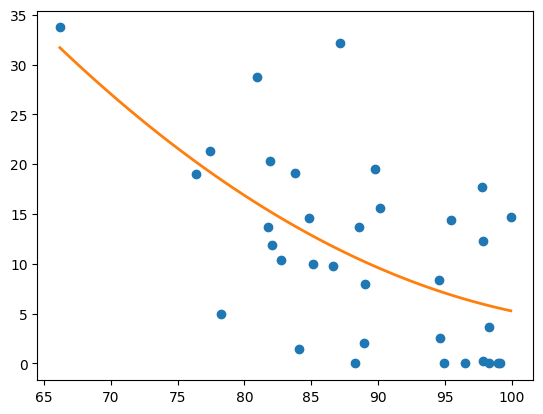

In [55]:
plt.plot(S[good_paths, t], V[good_paths, t + 1] * df, 'o')
xx, yy = p.linspace()
plt.plot(xx, yy, lw=2)
plt.show()

In [49]:
np.linspace(0.0, 1.0, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [57]:
df = pd.DataFrame(S)

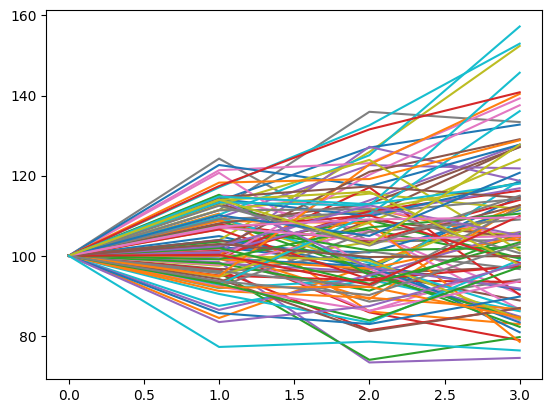

In [58]:
df.T.plot(legend=False)
plt.show()

https://numpy.org/doc/stable/reference/routines.polynomials.classes.html

In [ ]:
plt.plot(np.linspace(0.0, 1.0, 4), S[:,0])